In [87]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [88]:
df = pd.read_csv('crop_yield_data.csv')

# Replace non-numeric values with NaN in the original DataFrame
df.replace('#VALUE!', np.nan, inplace=True)

In [89]:
df.head()

,N,P,K,pH,Humidity,Temperature,Rainfall,CropYield,District,SoilType,CropName
0,60,32.0,39.0,5.0,71.0,26.0,2050.0,1250.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute
1,55,30.0,37.0,4.9,70.0,24.0,2000.0,1180.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute
2,65,33.0,41.0,5.1,72.0,27.0,2150.0,1330.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute
3,61,31.0,38.0,5.0,71.0,25.0,2100.0,1280.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute
4,64,34.0,40.0,5.2,74.0,28.0,2250.0,1370.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute


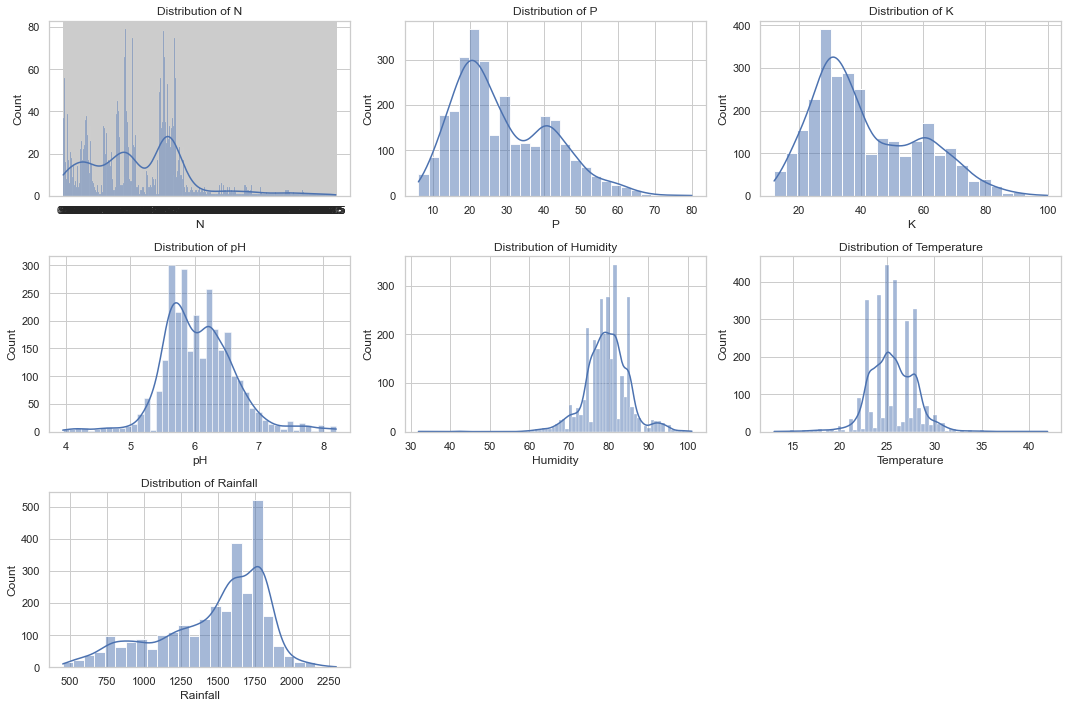

In [90]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Histograms for numerical variables
numerical_features = ['N', 'P', 'K', 'pH', 'Humidity', 'Temperature', 'Rainfall']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

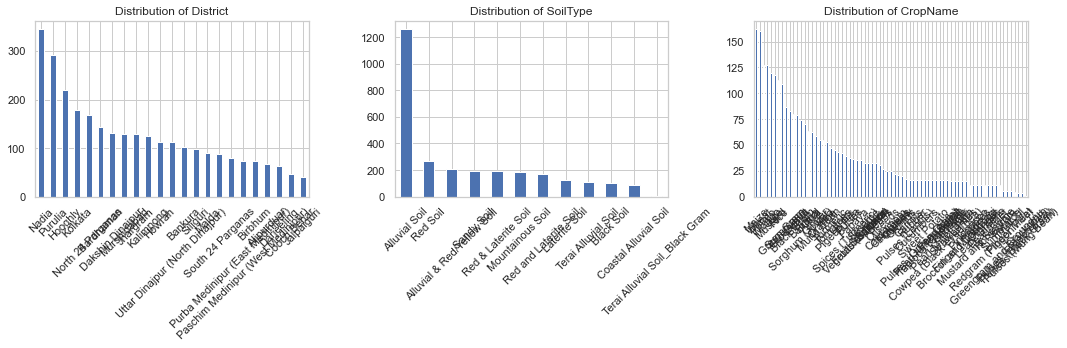

In [91]:
# Bar chart for categorical variables
categorical_features = ['District', 'SoilType', 'CropName']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    df[feature].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

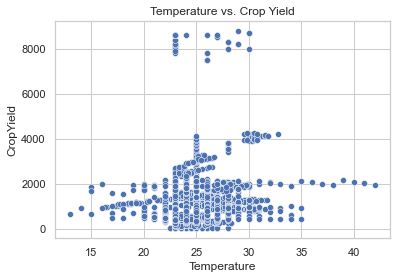

In [92]:
# Scatter plot for relationships (example: Temperature vs. Yield)
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Temperature', y='CropYield')
plt.title('Temperature vs. Crop Yield')
plt.show()

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2907 entries, 0 to 2906
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2906 non-null   object 
 1   P            2907 non-null   float64
 2   K            2907 non-null   float64
 3   pH           2907 non-null   float64
 4   Humidity     2907 non-null   float64
 5   Temperature  2907 non-null   float64
 6   Rainfall     2907 non-null   float64
 7   CropYield    2907 non-null   float64
 8   District     2907 non-null   object 
 9   SoilType     2907 non-null   object 
 10  CropName     2907 non-null   object 
dtypes: float64(7), object(4)
memory usage: 249.9+ KB


In [94]:
df.shape

(2907, 11)

In [95]:
df.isnull()

,N,P,K,pH,Humidity,Temperature,Rainfall,CropYield,District,SoilType,CropName
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2902,False,False,False,False,False,False,False,False,False,False,False
2903,False,False,False,False,False,False,False,False,False,False,False
2904,False,False,False,False,False,False,False,False,False,False,False
2905,False,False,False,False,False,False,False,False,False,False,False


In [96]:
df.duplicated().sum()

485

In [97]:
df=df.drop_duplicates()

In [98]:
df.duplicated().sum()

0

In [99]:
df.head()

,N,P,K,pH,Humidity,Temperature,Rainfall,CropYield,District,SoilType,CropName
0,60,32.0,39.0,5.0,71.0,26.0,2050.0,1250.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute
1,55,30.0,37.0,4.9,70.0,24.0,2000.0,1180.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute
2,65,33.0,41.0,5.1,72.0,27.0,2150.0,1330.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute
3,61,31.0,38.0,5.0,71.0,25.0,2100.0,1280.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute
4,64,34.0,40.0,5.2,74.0,28.0,2250.0,1370.0,Jalpaiguri,Alluvial & Red/Yellow Soil,Jute


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2422 entries, 0 to 2906
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2421 non-null   object 
 1   P            2422 non-null   float64
 2   K            2422 non-null   float64
 3   pH           2422 non-null   float64
 4   Humidity     2422 non-null   float64
 5   Temperature  2422 non-null   float64
 6   Rainfall     2422 non-null   float64
 7   CropYield    2422 non-null   float64
 8   District     2422 non-null   object 
 9   SoilType     2422 non-null   object 
 10  CropName     2422 non-null   object 
dtypes: float64(7), object(4)
memory usage: 227.1+ KB


In [101]:
features_for_crop = ['N', 'P', 'K', 'pH', 'Humidity', 'Temperature', 'Rainfall', 'District', 'SoilType']
X_crop = df[features_for_crop]
y_crop = df['CropName']

# Define features and target variables for yield prediction, now including 'CropName'
features_for_yield = features_for_crop + ['CropName']
X_yield = df[features_for_yield]
y_yield = df['CropYield']


In [102]:
# Define numeric and categorical transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_features_crop = ['District', 'SoilType']
categorical_features_yield = ['District', 'SoilType', 'CropName']

categorical_transformer_crop = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

categorical_transformer_yield = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessors
preprocessor_for_crop = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer_crop, categorical_features_crop)
    ]
)

preprocessor_for_yield = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer_yield, categorical_features_yield)
    ]
)

In [103]:
model_crop = Pipeline([
    ('preprocessor', preprocessor_for_crop),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [104]:
model_yield = Pipeline([
    ('preprocessor', preprocessor_for_yield),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [105]:
# Splitting the dataset into training and testing sets for both models
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X_crop, y_crop, test_size=0.2, random_state=42)
X_train_yield, X_test_yield, y_train_yield, y_test_yield = train_test_split(X_yield, y_yield, test_size=0.2, random_state=42)

In [106]:
# Training the models
model_crop.fit(X_train_crop, y_train_crop)
model_yield.fit(X_train_yield, y_train_yield)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['N', 'P', 'K', 'pH',
                                                   'Humidity', 'Temperature',
                                                   'Rainfall']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['District', 'SoilType',
                                                   'CropName'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [107]:
#Example input with some missing values (ensure to fill all required fields)
input_data = {
    'N': 40, 'P': 19, 'K': 30, 'pH': 6.1, 'Humidity': 79, 'Temperature': 27, 'Rainfall': 1650,
    'District': 'Hooghly', 'SoilType': 'Alluvial Soil'
}

In [108]:
def predict_with_adjusted_yield(input_data, top_n=2):
    sample_input_crop = pd.DataFrame([input_data])
    # Predict the probability of each crop
    crop_probabilities = model_crop.predict_proba(sample_input_crop)[0]
    top_crop_indices = np.argsort(crop_probabilities)[::-1][:top_n]
    top_crops = np.array(model_crop.classes_)[top_crop_indices]
    
    top_crops_with_yield = []
    for crop in top_crops:
        # Adjust input data to include the predicted 'CropName' for yield prediction
        input_data_with_crop = input_data.copy()
        input_data_with_crop['CropName'] = crop
        sample_input_yield = pd.DataFrame([input_data_with_crop])
        
        yield_prediction = model_yield.predict(sample_input_yield)[0]
        top_crops_with_yield.append((crop, yield_prediction))
    
    # Ensure the yield of the second best fit is not more than the best fit
    if top_n > 1 and top_crops_with_yield[1][1] > top_crops_with_yield[0][1]:
#         print("Adjusting the yield of the second best fit crop to not exceed the best fit crop's yield.")
        # Apply a scaling factor to adjust the yield of the second best fit crop
        # This could be based on the difference in probabilities, or simply a fixed percentage less than the best fit
        adjustment_factor = 0.9  # For demonstration, reduce by 10%
        adjusted_yield = top_crops_with_yield[0][1] * adjustment_factor
        top_crops_with_yield[1] = (top_crops_with_yield[1][0], adjusted_yield)
    
    return top_crops_with_yield

input_data = {
    'N': 55,  # Nitrogen content
    'P': 18,  # Phosphorus content
    'K': 50,  # Potassium content
    'pH': 6.4,  # pH value of the soil
    'Humidity': 77,  # Humidity in percentage
    'Temperature': 26,  # Temperature in Celsius
    'Rainfall': 880,  # Rainfall in mm
    'District': 'Dakshin Dinajpur',  # Name of the district
    'SoilType': 'Alluvial Soil'  # Type of the soil
}


# Using the modified function to predict the best and second best fit crops and their yields
top_crops_with_yield = predict_with_adjusted_yield(input_data, top_n=2)

# Displaying the predictions with explicit mention of the best fit and alternatives
print(f"Best Fit Crop: {top_crops_with_yield[0][0]}, Expected Yield: {top_crops_with_yield[0][1]}")
for i, (crop, yield_prediction) in enumerate(top_crops_with_yield[1:], start=1):
    print(f"Alternative Crop {i}: {crop}, Expected Yield: {yield_prediction}")

Best Fit Crop: Jute, Expected Yield: 968.6
Alternative Crop 1: Maize, Expected Yield: 957.5


In [109]:
# Making predictions with the function
top_crops_with_yield = predict_with_adjusted_yield(input_data, top_n=2)

In [110]:
# Making predictions with the function
# Making predictions with the function
top_crops_with_yield = predict_with_adjusted_yield(input_data, top_n=2)

# Displaying the predictions with explicit mention of the best fit and alternatives
print(f"Best Fit Crop: {top_crops_with_yield[0][0]}, Expected Yield: {top_crops_with_yield[0][1]}")
for i, (crop, yield_prediction) in enumerate(top_crops_with_yield[1:], start=1):
    print(f"Alternative Crop {i}: {crop}, Expected Yield: {yield_prediction}")

Best Fit Crop: Jute, Expected Yield: 968.6
Alternative Crop 1: Maize, Expected Yield: 957.5


In [111]:
from sklearn.metrics import accuracy_score

# Predict crop names on the test set
y_pred_crop = model_crop.predict(X_test_crop)

# Calculate accuracy
accuracy = accuracy_score(y_test_crop, y_pred_crop)

# Print the accuracy
print(f"Model Crop Accuracy: {accuracy}")

Model Crop Accuracy: 0.7938144329896907


In [112]:
import pickle

# Save the crop prediction model
with open('model_crop.pkl', 'wb') as file:
    pickle.dump(model_crop, file)

# Save the yield prediction model
with open('model_yield.pkl', 'wb') as file:
    pickle.dump(model_yield, file)